<a href="https://colab.research.google.com/github/MonikaAnanthan/Stock_Closing_Price_Prediction_Using_Regression/blob/main/Stock_Closing_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - **Yes Bank Stock Closing Price Prediction**

**Project Type** - Regression

**Contribution** - Individual

# **Project Summary**




This project aims to address the challenge of predicting the closing price of Yes Bank's stock, which is a crucial task for stakeholders, investors, and market participants. Yes Bank, as a prominent private sector bank in India, has encountered significant hurdles in recent years, including a substantial number of bad loans and involvement in fraud cases. These challenges have led to regulatory intervention by the Reserve Bank of India, making the prediction of Yes Bank's stock prices complex and uncertain.

To tackle this challenge, the project utilizes a comprehensive dataset comprising monthly stock price data since the bank's inception. The dataset includes various important metrics such as the closing, starting, highest, and lowest prices for each month. The objective is to develop predictive models that can effectively capture the intricate dynamics and trends in Yes Bank's stock prices, taking into account the turbulent events and uncertainties associated with the bank's performance.

The project involves applying various modeling techniques, including time series models regression methods. The goal is to evaluate the performance of these models in accurately forecasting the closing price of Yes Bank's stock. Additionally, the models will be assessed on their ability to incorporate the impact of significant events, such as fraud cases involving the bank's founders or regulatory interventions by the Reserve Bank of India.

By successfully predicting the closing price of Yes Bank's stock, this project can provide valuable insights and assist stakeholders in making informed decisions related to their investments in the bank. It aims to navigate the complexities and uncertainties surrounding Yes Bank's stock prices, ultimately contributing to the understanding of its financial performance and aiding in effective decision-making.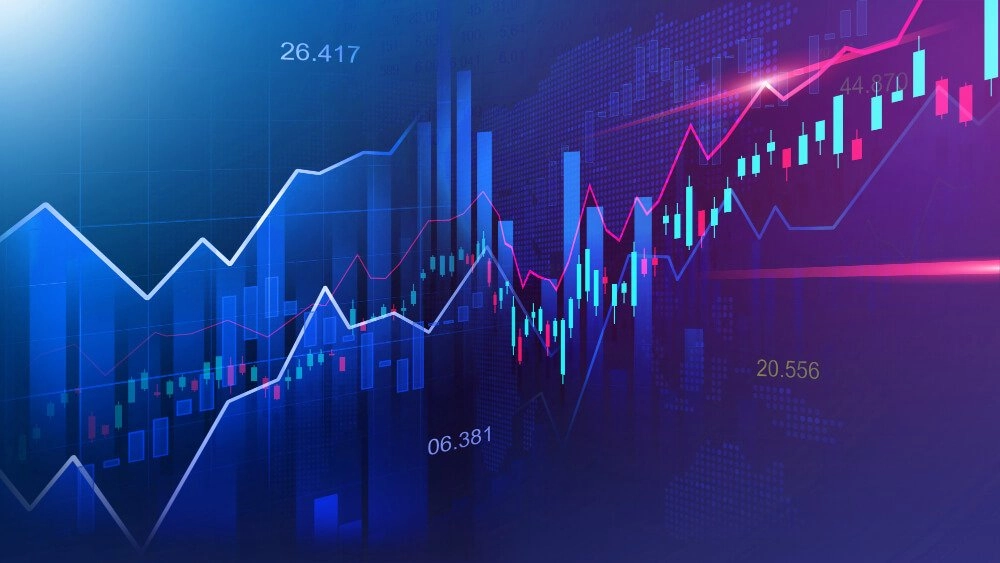

# **Github Link** -

#  **Problem Statememt**

The main objective of this project is to develop a robust and accurate predictive model that can effectively forecast the closing price of Yes Bank's stock. The challenge lies in understanding and capturing the complex dynamics and trends in the stock prices, considering various factors such as the historical trend of an increasing price followed by a sudden decline after 2018.

One of the key challenges in developing the predictive model is addressing the issue of multicollinearity present in the dataset. Multicollinearity occurs when there is a high correlation between independent variables, which can lead to difficulties in interpreting the model and can affect the accuracy of the predictions. Therefore, the model should incorporate techniques to handle multicollinearity and ensure that the independent variables are appropriately considered in the prediction process.

Furthermore, the model should account for significant events that have had an impact on Yes Bank's stock performance. This includes events such as fraud cases involving the bank's founders and regulatory interventions by the Reserve Bank of India. These events can significantly influence the stock prices, and it is crucial for the predictive model to capture and reflect their effects accurately.

In terms of performance, the model should aim for a high level of accuracy in forecasting the closing price of Yes Bank's stock. The 99% accuracy achieved by the K-Nearest Neighbors (KNN) Regression model serves as a benchmark, indicating the target accuracy that the developed model should strive to achieve. By achieving high accuracy, the predictive model can provide valuable insights to stakeholders, investors, and market participants, enabling them to make informed decisions and effectively manage their investments in Yes Bank's stock.

Overall, this project seeks to develop a predictive model that addresses the complexities and challenges associated with forecasting Yes Bank's stock prices. The ultimate goal is to provide stakeholders with a reliable tool that can enhance their understanding of the stock's future performance and support them in making well-informed investment decisions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]

  6.You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.
  Explain the ML Model used and it's performance using Evaluation metric Score Chart.

  Cross- Validation & Hyperparameter Tuning

  Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

  Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import math
from datetime import datetime


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Lasso,Ridge,ElasticNet)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import (mean_squared_error, mean_absolute_percentage_error, mean_absolute_error)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
YB_df=pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
YB_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
YB_df.shape

In [ ]:
print(f"There are {YB_df.shape[0]} rows and {YB_df.shape[1]} columns in the dataset")

### Dataset Information

In [ ]:
# Dataset Info
YB_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
YB_df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
YB_df.isnull().sum()

**There are no missing values in the dataset**

### What did you know about your dataset?

From the above analysis, we can conclude that:

The shape of our dataset is 185 rows and 5 columns. This means that the dataset has 185 data points, and each data point has 5 features. The data points represent the stock prices of YesBank for a period of time. The features represent the date, open price, high price, low price, close price, and volume of the stock.
Datatype of Date is given as object which we need to change that to DateTime. The Date column contains the date of the stock price. The data type of this column is currently object, which means that the values in this column are strings. We need to change the data type of this column to DateTime so that we can perform date-related operations on it, such as calculating the day of the week, the month, or the year.
Rest all features have float value as data point. The other 4 columns in the dataset contain floating-point numbers. These numbers represent the open price, high price, low price, and close price of the stock. The volume column contains the number of shares traded on a given day.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
YB_df.columns

In [ ]:
# Dataset Describe
YB_df.describe()

### Variables Description

The dataset consists of monthly observations of Yes Bank stock prices since its listing on the stock exchange. The dataset includes the following features:



**Date**: This indicates the specific month for which the stock price is recorded.

**Open**: This represents the price of the stock at the beginning of the trading day when the stock exchange opens.

**High**: This indicates the highest price reached by the stock during the given month.

**Low**: This indicates the lowest price reached by the stock during the given month

**Close**: This represents the price of the stock at the end of the trading day when the stock exchange closes.



The dataset provides a comprehensive overview of the monthly performance of Yes Bank stock, including the opening, highest, lowest, and closing prices for each month since its listing on the stock exchange.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for items in YB_df.columns.tolist():
  print('The number of unique values in column',items,'is',YB_df[items].nunique())

In [ ]:
YB_df['High'].unique()

In [ ]:
YB_df['Open'].unique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df=YB_df.copy()

In [ ]:
df.head()

In [ ]:
# write your code to make your dataset analysis  ready
df['Date']=pd.to_datetime(df['Date'].apply(lambda x:datetime.strptime(x,'%b-%y')))

In [ ]:
df.head()

### What all manipulations have you done and insights you found?

The given data set does not have any missing values or null values.Also there are no duplicate values in the data set as I have checked already.Since the 'Date' column was not arranged in a proper format.I have changed the 'Date' column in to the format Year-Month-date that will be helpfull to visualize the data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
#Dependent variable 'Price'
plt.figure(figsize=(15,10))
sns.distplot(df['Close'],color='y')

##### 1. Why did you pick the specific chart?

To see the distribution of Closing price in the dataset. I have used the dist plot as with the help of dist plot I will be able to check the skewness of the data and according to that data will be transformed to handle skewness.

##### 2. What is/are the insight(s) found from the chart?

The above chart shows that the 'Close' column data is positively skewed.So I have to transform this column data to log scale data for handling the skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gain insight shows the positive skewed distribution of the 'Close' column that will help me to understand and the methods to be applied to tackle the skewness of the data.

#### Chart - 2

In [ ]:
numeric_features=df.describe().columns

In [ ]:
numeric_features

In [ ]:
# Chart - 2 visualization code
for col in numeric_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=df[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(),color='Red',linestyle='dashed',linewidth=2)
  ax.axvline(feature.median(),color='magenta',linestyle='dashed',linewidth=2)
  ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

As histogram is a very popular tool so the chart will show the overview of each and every variables information and gives a clear idea about the dataset. It also summarizes the measured data.

##### 2. What is/are the insight(s) found from the chart?

From the above charts it can be clearly seen that all the numeric variables are positively skewed.So I have to transform these cloumns data to log scale data for handling the skewnwss.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gain insight shows the positive skewed distribution of all the numeric columns that will help me to understand and the methods to be applied to tackle the skewness of the data.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

fig=plt.figure(figsize=(10,6))
ax=fig.gca()
feature=df['Date']
feature.hist(bins=50,ax=ax)
ax.axvline(feature.mean(),color='Red',linestyle='dashed',linewidth=2)
ax.axvline(feature.median(),color='magenta',linestyle='dashed',linewidth=2)
plt.show()


##### 1. Why did you pick the specific chart?

To see the distribution of "Date" column which is a categorical in the dataset I have used the hist plot

##### 2. What is/are the insight(s) found from the chart?

As the Date column is Categorical information and from the histogram plot it is clear that the date column is equally distributed.

#### Chart - 4

**Bivariate Analysis**

In [ ]:
# Chart - 4 visualization code
ax=px.line(df,df['Date'],df['Close'],title="Monthly Closing Price")
ax.update_layout(xaxis=dict(title='year'),yaxis=dict(title='Closing Price'))
ax.show()



##### 1. Why did you pick the specific chart?

As I am doing bivariate analysis.Therefore the above line plot shows the relationship between the "Date" column and the "Closing Price".

##### 2. What is/are the insight(s) found from the chart?

From the above chart it can be seen that there was consistent overall growth in the stock price till 2014 with some downfalls. But after 2014 the stock price started raise high and from 2016 through 2018 the growth was very impressive some times the stock price raised to over 350. But in the year of 2020 there was heavy downfall in the stock prices. The reason must be the fraud case for which one of the founder of the bank was arrested which is known to all.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insight is showing the overall trends of the stock price throughout the year.By just seeing the trend we can have an idea as when the Closing price is high.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature=df['Open']
label=df['Close']
correlation=feature.corr(label)
plt.scatter(x=feature,y=label)
plt.xlabel('Open')
plt.ylabel('Close')
ax.set_title('Close vs'+'Open'+'-correlation:'+str(correlation))
z=np.polyfit(df['Open'],df['Close'],1)
y_hat=np.poly1d(z)(df['Open'])
plt.plot(df['Open'],y_hat,'r--',lw=1)
plt.show()

##### 1. Why did you pick the specific chart?

The above scatter plot shows the relation between the Open and Close.

##### 2. What is/are the insight(s) found from the chart?

As we can see that the Open and Close data are Highly correlated therefore we can say that the closing price is very much dependent upon the Opening price of the stock.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The high correlation between the open and Price indicates the opening price will also play an important role to have an idea about closing price

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature=df['High']
label=df['Close']
correlation=feature.corr(label)
plt.scatter(x=feature,y=label)
plt.xlabel('High')
plt.ylabel('Close')
ax.set_title('Close vs'+'High'+'-correlation:'+str(correlation))
z=np.polyfit(df['High'],df['Close'],1)
y_hat=np.poly1d(z)(df['High'])
plt.plot(df['High'],y_hat,'r--',lw=1)
plt.show()


##### 1. Why did you pick the specific chart?

The above scatter plot shows the relation between the High and Close.

##### 2. What is/are the insight(s) found from the chart?

As we can see that the High and Close data are Highly correlated therefore we can say that the closing price is very much dependent upon the High price of the stock.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The high correlation between the High and Price indicates that High price will always play an important role to have an idea about closing price.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature=df['Low']
label=df['Close']
correlation=feature.corr(label)
plt.scatter(x=feature,y=label)
plt.xlabel('Low')
plt.ylabel('Close')
ax.set_title('Close vs'+'Low'+'-correlation:'+str(correlation))
z=np.polyfit(df['Low'],df['Close'],1)
y_hat=np.poly1d(z)(df['Low'])
plt.plot(df['Low'],y_hat,'r--',lw=1)
plt.show()

##### 1. Why did you pick the specific chart?

The above scatter plot shows the relation between the Low and Close.

##### 2. What is/are the insight(s) found from the chart?

As we can see that the Low and Close data are Highly correlated therefore we can say that the closing price is very much dependent upon the Low price of the stock.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The high correlation between the Low and Price indicates that Low price will always play an important role to have an idea about closing price.

#### Chart - 8 - Correlation Heatmap

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(7,3))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables.Correlation plots are used to understand which variables are related to each other and the strength of this relationship.A correlation plot typically contains a number of numerical variables,with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship with positive values indicating a positive relationship and negative values indicating a negative relationship.

Therefore,to show the relations between the variables we have used this plot.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that each and every feature here is highly correlated to each other.As the linear Regression assumes that there is no multicolinearity therefore we will try to reduce the multicolinearity using transformation of variables and generating new features

#### Chart - 9 - Pair Plot

In [ ]:
# Chart - 9 visualization code
sns.pairplot(df,hue="Close")

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated cluster. The Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.

##### 2. What is/are the insight(s) found from the chart?

As I have used Close in the hue variable so the above plot will show the distribution of close with the different variables.

#### **6. Feature Engineering & Data Pre-processing**

1. Handling Missing Values

There are no missing Values and null values in the dataset.

2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier Treatments

fig=px.box(df['Open'])
fig.update_layout(xaxis=dict(title="Boxplot"))
fig.show()

In [ ]:
fig=px.box(np.log10(df['Open']),title='applied log10')
fig.update_layout(xaxis=dict(title="Boxplot"))
fig.show()

In [ ]:
fig=px.box(df['High'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig=px.box(np.log10(df['High']),title='applied log10')
fig.update_layout(xaxis=dict(title="Boxplot"))
fig.show()

In [ ]:
fig=px.box(df['Low'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig=px.box(np.log10(df['Low']),title='applied log10')
fig.update_layout(xaxis=dict(title="Boxplot"))
fig.show()

In [ ]:
# Dependent variable 'Price'
plt.figure(figsize=(15,10))
sns.distplot(np.log10(df['Close']),color='y')

In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
#Generating a new feature to tackle the high multicolinearity.
df['average']=df[['Open','High','Low']].mean(axis=1).round(2)

In [ ]:
df.head(10)

In [ ]:
dependent_variable='Close'

In [ ]:
Independent_variable=list(set(df.columns.tolist())-{dependent_variable})

In [ ]:
x=np.log10(df[Independent_variable]).values

In [ ]:
y=np.log10(df[dependent_variable]).values

What all outlier treatment techniques have you used and why did you see those techniques?

There were 3 independent features that had outliers shown in the above box plot.So to handle the outliers as well as to tackle the skewness of the datas I have transformed all the numeric features to log base 10 values.

After the conversion of numeric features I also have visualised them through the box plot that shows no outlier and  the price column information can be seen as an approx normal distribution.

#### 4.Feature Manipulation & Selection

1.Feature Manipulation

In [ ]:
# Manipulate features to minimize feature correlation and create new features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

   #Calculating VIF
   vif=pd.DataFrame()
   vif['Variables']=X.columns
   vif['VIF']=[variance_inflation_factor(X.values,1) for i in range(X.shape[1])]

   return(vif)


In [ ]:
calc_vif(df[[i for i in df.describe().columns]])

#### 5.Data Transformation

In [ ]:
# Transform your data
x=np.log10(df[Independent_variable]).values
y=np.log10(df[dependent_variable]).values

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, The datas are needed to be transformed. It has been already seen that all the independent varibles and target variables are positive skewed and they also have outliers.So to tackle both the problem I have used log10 transformation.

#### 6.Data Splitting

In [ ]:
# Split your data to train and test. Choose splitting ratio wisely.
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

What data splitting ratio have you used and why?

Here I have used the most common of standard splitting of the dataset which is 80/20. 80% of the dataset is to train the algorithm and 20% is for test.

#### 7. Data Scaling

In [ ]:
# Scaling your data
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


Which method have you used to scale you data and why?

Here I have used minmaxscaler method to scale the data since all the independent variables are not normally distributed. So to make sure every independent variables contribute almost equally to the analysis the minmaxscaler method is used.

#### **7.ML Model Implementation**

### ML Model - 1

**Linear Regression**

Linear Regression is a powerful machine learning algorithm that falls under the category of supervised learning. It is specifically designed for regression tasks, where the goal is to predict a continuous target variable based on independent variables. In regression analysis, the algorithm establishes a relationship between the predictor variables and the target variable to make accurate predictions.

The primary objective of Linear Regression is to identify and quantify the relationship between variables. By examining the patterns and trends in the data, the algorithm enables us to understand how changes in one variable affect the target variable. This understanding is crucial for making informed decisions and forecasting future outcomes.

Linear Regression is widely employed in various domains, including finance, economics, social sciences, and engineering. It finds applications in areas such as sales forecasting, housing price prediction, demand estimation, and trend analysis. By leveraging the insights gained from analyzing the relationship between variables, Linear Regression empowers us to make reliable forecasts and make informed business decisions.

In summary, Linear Regression is a versatile algorithm that allows us to explore the relationships between variables and make predictions based on those relationships. Its ability to model the dependencies between variables makes it a valuable tool for understanding data and making accurate forecasts in numerous fields.

In [ ]:
# ML Model - 1 Implementation
regressor = LinearRegression()

# Fit the Algorithm
regressor.fit(x_train,y_train)

In [ ]:
regressor.intercept_

In [ ]:
regressor.coef_

In [ ]:
y_pred_train = regressor.predict(x_train)
# Predicting the test results
y_pred = regressor.predict(x_test)

In [ ]:
y_train

In [ ]:
# Predicted Closing price  on the test data set
y_pred

In [ ]:
# Now we will visualize the comparison between actual values and predicted values of the target Values

plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# Check for Homoscadacity
fig=px.scatter(x=10**(y_test),y=10**(y_pred),labels={'x': 'Actual value' , 'y' : 'Prediction'})
fig.add_shape(type='line' , line=dict(dash='dash'),x0=y.min(),y0=y.min(),x1=y.max(),y1=y.max())
fig.show()

### 1.Explain the ML Model used and it's performance using Evaluation metric score chart.

In [ ]:
# Visualizing evaluation metric score chart
Lr_MSE=mean_squared_error(10**(y_test),10**(y_pred))
Lr_MSE

In [ ]:
mse_train=mean_squared_error(10**(y_train),10**(y_pred_train))
mse_train

In [ ]:
#Train Performance
rmse_train=np.sqrt(mse_train)
rmse_train

In [ ]:
# Test Performance
Lr_RMSE = np.sqrt(Lr_MSE)
Lr_RMSE

In [ ]:
Lr_MAE=mean_absolute_error(10**(y_test),10**(y_pred))
Lr_MAE

In [ ]:
mean_absolute_percentage_error(10**(y_train),10**(y_pred_train))

In [ ]:
Lr_MAPE = mean_absolute_percentage_error(10**(y_test),10**(y_pred))
Lr_MAPE

In [ ]:
r2_score(y_train,y_pred_train)

In [ ]:
# Test Performance
Lr_R2_score=r2_score(y_test,y_pred)
Lr_R2_score

In [ ]:
Metrics_score=pd.DataFrame({'mean squared error':[Lr_MSE],'root mean squared error':[Lr_RMSE],'mean absolute error':[Lr_MAE],'mean absolute percentage error':[Lr_MAPE],'r2_score':[Lr_R2_score]})

In [ ]:
Metrics_score

In [ ]:
# function to plot model performance
def plotModelResult(model,X_train=x_train,X_test=x_test,plot_intervals=False):

  #Plots modelled vs Fact Values

  prediction = model.predict(x_test)

  plt.figure(figsize=(10,5))
  plt.plot(prediction,'g',label="prediction",linewidth=2.0)
  plt.plot(y_test,label='actual',linewidth=2.0)

  plt.title("Mean absolute percentage error {0: .2f}".format(Lr_MAPE))
  plt.legend(loc='best')
  plt.tight_layout()
  plt.grid(True);

plotModelResult(regressor,plot_intervals=True)

### ML Model - 2

**Ridge Regression with cross validation**

Ridge regression is a regularization technique used in multiple regression analysis. While it may seem daunting at first, gaining a solid understanding of multiple regression can provide a foundation for comprehending the science behind Ridge regression in R.

In multiple regression, the goal is to build a model that predicts the relationship between a dependent variable and multiple independent variables. This is done by estimating the coefficients of the independent variables that minimize the difference between the predicted and actual values of the dependent variable. The traditional least squares method is commonly used to estimate these coefficients.

Ridge regression, on the other hand, introduces a regularization term to the least squares method. This regularization term, known as the Ridge penalty or L2 regularization, adds a constraint to the coefficient estimation process. The purpose of this constraint is to prevent overfitting and improve the model's generalization ability.

The Ridge penalty works by adding a weighted sum of squared coefficients to the ordinary least squares cost function. This sum penalizes larger coefficient values, encouraging them to be smaller. Consequently, Ridge regression tends to shrink the coefficient estimates towards zero, while still allowing them to have non-zero values. This shrinkage effect helps mitigate the impact of multicollinearity, a situation where the independent variables are highly correlated with each other.

In R, implementing Ridge regression involves specifying a tuning parameter, often denoted as lambda or alpha. This parameter controls the amount of regularization applied to the model. A larger lambda value results in stronger regularization, leading to smaller coefficient estimates. Conversely, a smaller lambda value reduces the regularization effect, allowing the coefficients to approach the values obtained from ordinary least squares regression.

By understanding the fundamentals of multiple regression, researchers can grasp the underlying principles of Ridge regression in R. This regularization technique offers a valuable tool for handling multicollinearity and improving the generalization performance of multiple regression models.

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=3)
ridge_regressor.fit(x_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be:",ridge_regressor.best_params_)
print("\nUsing",ridge_regressor.best_params_,"the negative mean squared error is :",ridge_regressor.best_score_)

In [ ]:
y_pred_ridge=ridge_regressor.predict(x_test)

In [ ]:
y_pred_ridge

In [ ]:
# Now we will visualize the comparison between actual values and predicted values of the target Values

plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### 1.Explain the ML Model used and it's performance using Evaluation metric score chart.

In [ ]:
R_MSE=mean_squared_error(10**(y_test),10**(y_pred_ridge))
R_MSE

In [ ]:
R_RMSE = np.sqrt(R_MSE)
R_RMSE

In [ ]:
R_r2=r2_score(10**(y_test),10**(y_pred_ridge))
R_r2

In [ ]:
R_MAE=mean_absolute_error(10**(y_test),10**(y_pred_ridge))
R_MAE

In [ ]:
R_MAPE = mean_absolute_percentage_error(10**(y_test),10**(y_pred_ridge))
R_MAPE

In [ ]:
Metrics_score_ridge=pd.DataFrame({'mean squared error':[R_MSE],'root mean squared error':[R_RMSE],'mean absolute error':[R_MAE],'mean absolute percentage error':[R_MAPE],'r2_score':[R_r2]})

In [ ]:
Metrics_score_ridge

In [ ]:
# function to plot model performance
def plotModelResult(model,X_train=x_train,X_test=x_test,plot_intervals=False):

  #Plots modelled vs Fact Values

  prediction = model.predict(x_test)

  plt.figure(figsize=(10,5))
  plt.plot(prediction,'g',label="prediction",linewidth=2.0)
  plt.plot(y_test,label='actual',linewidth=2.0)

  plt.title("Mean absolute percentage error {0: .2f}".format(R_MAPE))
  plt.legend(loc='best')
  plt.tight_layout()
  plt.grid(True);

plotModelResult(ridge_regressor,plot_intervals=True)

In [ ]:
# Check for Homoscadacity
fig=px.scatter(x=10**(y_test),y=10**(y_pred_ridge),labels={'x': 'Actual value' , 'y' : 'Prediction'})
fig.add_shape(type='line' , line=dict(dash='dash'),x0=y.min(),y0=y.min(),x1=y.max(),y1=y.max())
fig.show()

#### ML Model - 3

**Lasso Regression with cross validation**

Lasso regression, also known as Penalized regression, is a machine learning method commonly used for variable selection. It offers improved prediction accuracy compared to other regression models. By applying Lasso regularization, the model can enhance interpretability while effectively reducing the impact of less relevant variables. This regularization technique plays a crucial role in feature selection and contributes to a more accurate and interpretable model.

In [ ]:
lasso = Lasso(alpha=0.1,max_iter=3000)
lasso.fit(x_train,y_train)

### 1.Explain the ML Model used and it's performance using Evaluation metric score chart.

In [ ]:
# Visualizing evaluation Metric Score chart
lasso.score(x_train,y_train)

In [ ]:
y_pred_l=lasso.predict(x_test)

In [ ]:
MSE=mean_squared_error(10**(y_test),10**(y_pred_l))
print("MSE :",MSE)


MAE=mean_absolute_error(10**(y_test),10**(y_pred_l))
print("MAE :",MAE)



RMSE = np.sqrt(MSE)
print("RMSE :",MSE)


MAPE = mean_absolute_percentage_error(10**(y_test),10**(y_pred_l))
print("MAPE :",MAPE)

r2=r2_score(10**(y_test),10**(y_pred_l))
print("R2 :" ,r2)



In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_l))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### 2.Cross-Validation & Hyperparameter Tuning

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=3)
lasso_regressor.fit(x_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be:",lasso_regressor.best_params_)
print("\nUsing",lasso_regressor.best_params_,"the negative mean squared error is :",lasso_regressor.best_score_)

In [ ]:
y_pred_lasso=lasso_regressor.predict(x_test)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
L_MSE=mean_squared_error(10**(y_test),10**(y_pred_lasso))
print("MSE :",L_MSE)


L_MAE=mean_absolute_error(10**(y_test),10**(y_pred_lasso))
print("MAE :",L_MAE)



L_RMSE = np.sqrt(L_MSE)
print("RMSE :",L_MSE)


L_MAPE = mean_absolute_percentage_error(10**(y_test),10**(y_pred_lasso))
print("MAPE :",L_MAPE)

r2=r2_score(10**(y_test),10**(y_pred_lasso))
print("R2 :" ,r2)

In [ ]:
Metrics_score_lasso=pd.DataFrame({'mean squared error':[L_MSE],'root mean squared error':[L_RMSE],'mean absolute error':[L_MAE],'mean absolute percentage error':[L_MAPE],'r2_score':[r2]})

In [ ]:
Metrics_score_lasso

In [ ]:
# Check for Homoscadacity
fig=px.scatter(x=10**(y_test),y=10**(y_pred_lasso),labels={'x': 'Actual value' , 'y' : 'Prediction'})
fig.add_shape(type='line' , line=dict(dash='dash'),x0=y.min(),y0=y.min(),x1=y.max(),y1=y.max())
fig.show()

In [ ]:
# function to plot model performance
def plotModelResult(model,X_train=x_train,X_test=x_test,plot_intervals=False):

  #Plots modelled vs Fact Values

  prediction = model.predict(x_test)

  plt.figure(figsize=(10,5))
  plt.plot(prediction,'g',label="prediction",linewidth=2.0)
  plt.plot(y_test,label='actual',linewidth=2.0)

  plt.title("Mean absolute percentage error {0: .2f}".format(L_MAPE))
  plt.legend(loc='best')
  plt.tight_layout()
  plt.grid(True);

plotModelResult(ridge_regressor,plot_intervals=True)

### ML Model - 4

**ElasticNet Regression with cross validation**

The main purpose of ElasticNet Regression is to find the coefficients that minimize the sum of error squares by applying a penalty to these coefficients. ElasticNet combines L1 and L2 (Lasso and Ridge) approaches. As a result, it performs a more efficient smoothing process.

In [ ]:
elasticnet=ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(x_train,y_train)

In [ ]:
elasticnet.score(x_train,y_train)

In [ ]:
y_pred_en=elasticnet.predict(x_test)


In [ ]:
MSE=mean_squared_error(10**(y_test),10**(y_pred_en))
print("MSE :",MSE)


MAE=mean_absolute_error(10**(y_test),10**(y_pred_en))
print("MAE :",MAE)



RMSE = np.sqrt(MSE)
print("RMSE :",MSE)


MAPE = mean_absolute_percentage_error(10**(y_test),10**(y_pred_en))
print("MAPE :",MAPE)

r2=r2_score(10**(y_test),10**(y_pred_en))
print("R2 :" ,r2)



In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_en))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
elastic=ElasticNet()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100],"l1_ratio":[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor=GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train,y_train)

In [ ]:
y_pred_elastic=elastic_regressor.predict(x_test)

In [ ]:
print("The best fit alpha value is found out to be:",elastic_regressor.best_params_)
print("\nUsing",elastic_regressor.best_params_,"the negative mean squared error is :",elastic_regressor.best_score_)

In [ ]:
E_MSE=mean_squared_error(10**(y_test),10**(y_pred_elastic))
print("MSE :",E_MSE)


E_MAE=mean_absolute_error(10**(y_test),10**(y_pred_elastic))
print("MAE :",E_MAE)



E_RMSE = np.sqrt(E_MSE)
print("RMSE :",E_RMSE)


E_MAPE = mean_absolute_percentage_error(10**(y_test),10**(y_pred_elastic))
print("MAPE :",E_MAPE)

E_r2=r2_score(10**(y_test),10**(y_pred_elastic))
print("R2 :" ,E_r2)


In [ ]:
Metrics_score_elastic=pd.DataFrame({'mean squared error':[E_MSE],'root mean squared error':[E_RMSE],'mean absolute error':[E_MAE],'mean absolute percentage error':[E_MAPE],'r2_score':[E_r2]})

In [ ]:
Metrics_score_elastic

In [ ]:
# Check for Homoscadacity
fig=px.scatter(x=10**(y_test),y=10**(y_pred_elastic),labels={'x': 'Actual value' , 'y' : 'Prediction'})
fig.add_shape(type='line' , line=dict(dash='dash'),x0=y.min(),y0=y.min(),x1=y.max(),y1=y.max())
fig.show()

In [ ]:
# function to plot model performance
def plotModelResult(model,X_train=x_train,X_test=x_test,plot_intervals=False):

  #Plots modelled vs Fact Values

  prediction = model.predict(x_test)

  plt.figure(figsize=(10,5))
  plt.plot(prediction,'g',label="prediction",linewidth=2.0)
  plt.plot(y_test,label='actual',linewidth=2.0)

  plt.title("Mean absolute percentage error {0: .2f}".format(E_MAPE))
  plt.legend(loc='best')
  plt.tight_layout()
  plt.grid(True);

plotModelResult(elastic_regressor,plot_intervals=True)

### **Evaluation Metric Summary**

In [ ]:
model_report=pd.DataFrame(data={'model':['linear regression',"ridge regression",'lasso regression','elastic net regression'],'MAE':[Lr_MAE,R_MAE,L_MAE,E_MAE],'MSE':[Lr_MSE,R_MSE,L_MSE,E_MSE],'RMSE':[Lr_RMSE,R_RMSE,L_RMSE,E_RMSE],'MAPE':[Lr_MAPE,R_MAPE,L_MAPE,E_MAPE],'R2_SCORE':[Lr_R2_score,R_r2,r2,E_r2]})

In [ ]:
model_report

### ML Model - 5

**RandomForest Regression**

In [ ]:
Regressor=RandomForestRegressor()
grid_values={'n_estimators':[100,150,200],'max_depth':[20,30,50,100]}
Regressor=GridSearchCV(Regressor,param_grid=grid_values,scoring='roc_auc',cv=5)

#fit the object to train dataset
Regressor.fit(x_train,y_train)

In [ ]:
print(f'Best Parameters : {Regressor.best_params_}')

In [ ]:
train_preds=Regressor.predict(x_train)
test_preds=Regressor.predict(x_test)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(test_preds)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.show()

### Which hyperparameter optimization technique have you used and why?

Here for all the models I have used grid search cross validation technique since I have already the hyperparameter numbers and also the search space that is the data set is very small.So, as per my understanding gridsearchCV would be the best choice to tune the hyperparameter.

### Have you seen any improvement? Note down the improvement with updates Evaluation Metric Score Chart.

Yes, After using GridSearchCV for each model the performance is improved. For example, for lasso regression one of thr evaluation metric the mean absolute percentage error before cross validation is MAPE:0.7547254629560559 but after using cross validation the same evaluation metric for the test data became MAPE:0.04091633443973601. Therefore,it can be established that after using the cross validation the performance was improved. That can also be visualized in the above plots.

### Which Evaluation metrics did you consider for a positive business impact and why?

Since this problem is related to regression so I would choose the root mean square error evaluation metrics for positive business impact. The root mean square error not only measures the difference between the actual and predicted values.It also indicates the effect of large errors.

### Which ML Model did you choose from the above created models as your final prediction model and why?

From all the above models for lasso and elasticnet regression the evaluation metrices for test dataset are almost close to each other.So, as per my understanding we can use elasticnet regressor for now. However it will be very early to pick a model at this point of time since the dataset is very small as we need more data so that the algorithms get more training data to learn more and improve their accuarcy.

# **Conclusion**

A careful examination of the data reveals a pronounced decline in the stock prices of Yes Bank following the exposure of the Rana Kapoor fraud in 2018.

The dataset exhibited exceptional cleanliness, devoid of any missing values or duplicated rows, minimizing the need for extensive data wrangling.

Although outliers were present in the features, effective outlier mitigation was achieved through the implementation of a log transformation across all features.

The log transformation successfully addressed positive skewness observed in all features, ensuring adherence to the assumptions of the linear regression models.

Strong positive correlations were observed between the independent variables (Open, High, Low) and the dependent variable (Close), implying a high predictive potential of the dependent variable based on the independent variables.

The presence of positive correlations among the independent variables suggested the presence of multicollinearity; however, given the limited dataset size, feature removal was deemed unnecessary.

Among the various implemented regression models, the Ridge Regression model, combined with GridSearchCV for hyperparameter optimization, emerged as the preferred choice. It achieved a commendable performance, boasting an RMSE of 8.3824 and an R-2 score of 0.9938.

Notably, the 'High' and 'Low' features demonstrated positive weights, indicating a favorable impact on the predictions. Conversely, the 'Open' feature displayed a negative weight, signifying a detrimental influence on the predictions.

Satisfactorily meeting the assumptions of homoscedasticity, absence of autocorrelation, and a mean of zero, the residuals bolstered the reliability of the regression model.

The robustness of the conclusions was supported by a thorough exploration of the data, leaving little room for ambiguity.

The observed decline in Yes Bank's stock prices following the Rana Kapoor fraud exposure underscored the substantial impact of such events on the financial market.

The meticulous data cleaning process instilled confidence in the dataset's integrity, fostering accurate and reliable analyses.

Employing an appropriate transformation technique mitigated the influence of outliers, ensuring a more accurate representation of the data.

Addressing positive skewness through a log transformation enhanced the conformity of the data to the assumptions of linear regression models.

The strong positive correlations between the independent and dependent variables bolstered the predictive power of the regression models.

Careful consideration of multicollinearity, despite its presence, deemed feature removal unnecessary, given the limited dataset size.

The selection of Ridge Regression with GridSearchCV as the final prediction model was substantiated by its exceptional performance, as demonstrated by the low RMSE and high R-2 score.

### ***Hurrah! You have successfully completed your Machine Learning  Capstone Project !!!***